### House price Prediction

In [2]:
import pandas as pd
data = pd.read_csv("C:\\Users\\Saicharan\\Downloads\\81 column dataset.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data=data.drop('Id',axis=1)

In [4]:
print('duplicate values:', data.duplicated().sum())

duplicate values: 0


In [5]:
pd.options.display.min_rows=81
print('no.of col and rows:',data.shape)
print('Null Values', data.isnull().sum())

no.of col and rows: (1460, 80)
Null Values MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual 

#### 1.Imputation

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
# Imputation for numeric columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
imputer = SimpleImputer(strategy='median')
data[num_cols] = imputer.fit_transform(data[num_cols])

print(num_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [9]:
# Imputation for categorical columns
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = imputer.fit_transform(data[cat_cols])

In [10]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0.0,Gd,MnPrv,Shed,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0.0,Gd,MnPrv,Shed,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0.0,Gd,MnPrv,Shed,0.0,12.0,2008.0,WD,Normal,250000.0


#### 2.Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat_cols:
    data[i] =  label_encoder.fit_transform(data[i])

#### 3.Handling Outliers - wisker

In [14]:
def wisker(col):
   q1=data[col].quantile(0.25)
   q3=data[col].quantile(0.75)
   iqr=q3-q1
   lower=q1-(1.5*iqr)
   upper=q3+(1.5*iqr)
   return lower,upper

In [15]:
import numpy as np
for i in data.columns:
  lower,upper=wisker(i)
  data[i]=np.where(data[i]<lower,lower,data[i])   
  data[i]=np.where(data[i]>upper,upper,data[i])

#### 4.Minmax Scaling


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1 = scaler.fit_transform(data)

In [18]:

data1 = pd.DataFrame(data1, columns=data.columns)

In [19]:
corr_matrix = data1.corr()
print("Correlation Matrix:")
print(corr_matrix)

target_corr = corr_matrix['SalePrice']
threshold = 0.3
filtered_col = target_corr[(target_corr > threshold) | (target_corr < -threshold)].index
data_filtered=data1[filtered_col]
data1=data_filtered

Correlation Matrix:
               MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
MSSubClass       1.000000       NaN    -0.399010 -0.403395     NaN    NaN   
MSZoning              NaN       NaN          NaN       NaN     NaN    NaN   
LotFrontage     -0.399010       NaN     1.000000  0.579385     NaN    NaN   
LotArea         -0.403395       NaN     0.579385  1.000000     NaN    NaN   
Street                NaN       NaN          NaN       NaN     NaN    NaN   
Alley                 NaN       NaN          NaN       NaN     NaN    NaN   
LotShape         0.106233       NaN    -0.141650 -0.301858     NaN    NaN   
LandContour           NaN       NaN          NaN       NaN     NaN    NaN   
Utilities             NaN       NaN          NaN       NaN     NaN    NaN   
LotConfig        0.073961       NaN    -0.176455 -0.197930     NaN    NaN   
LandSlope             NaN       NaN          NaN       NaN     NaN    NaN   
Neighborhood    -0.009075       NaN     0.111561  0.0985

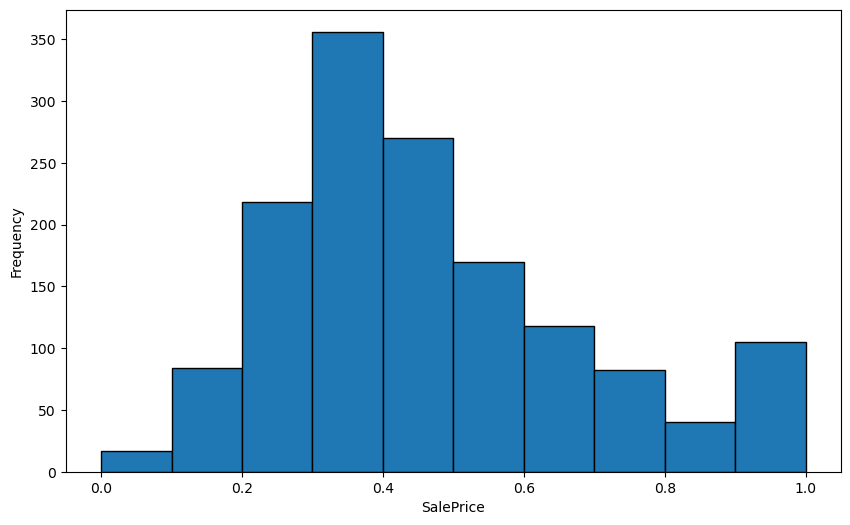

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data1['SalePrice'], bins=10, edgecolor='black')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


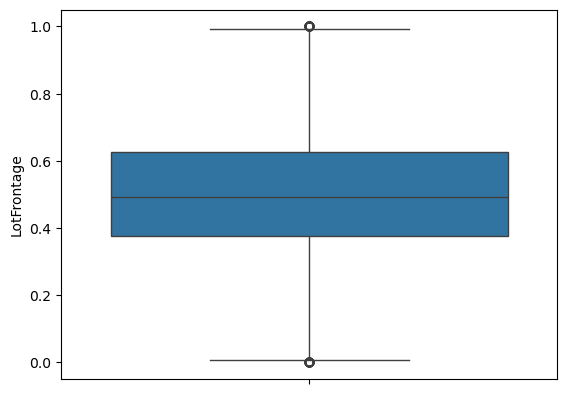

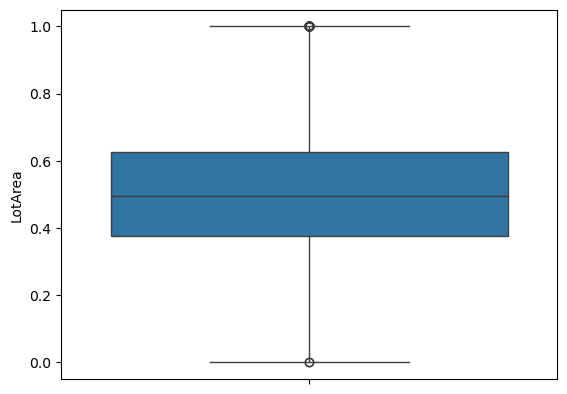

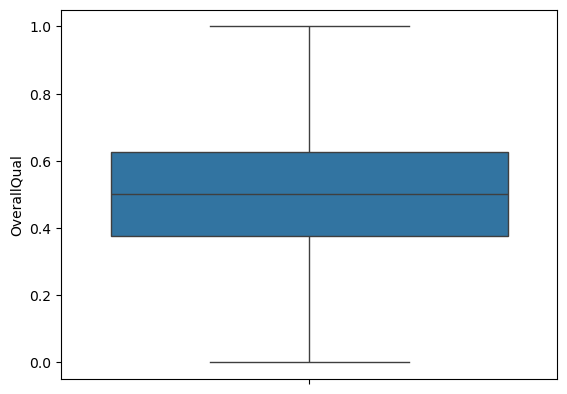

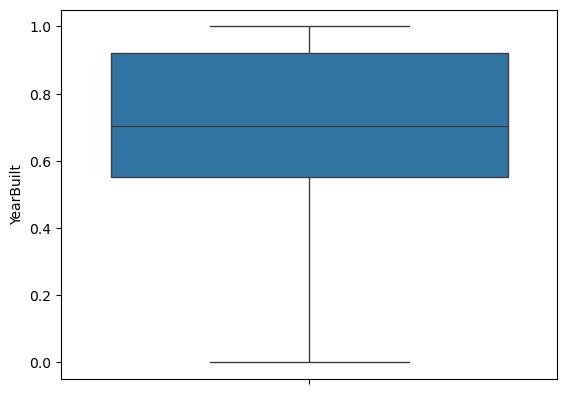

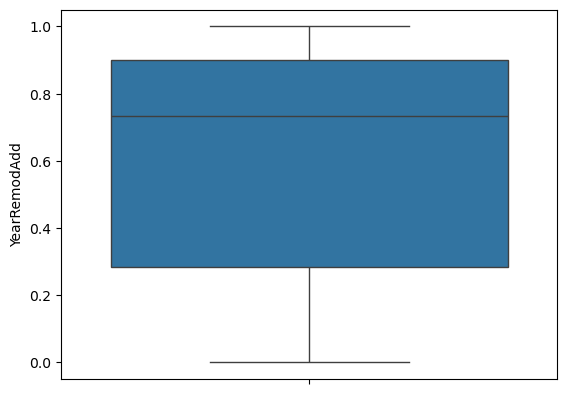

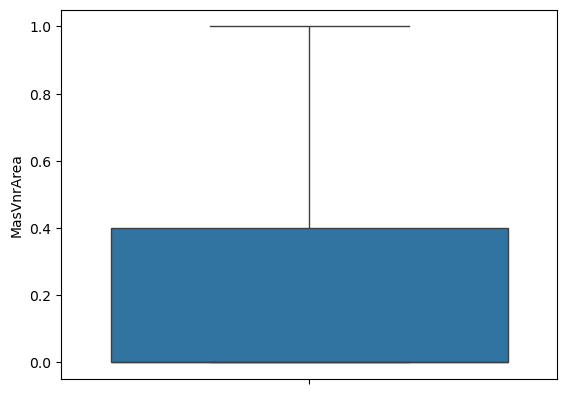

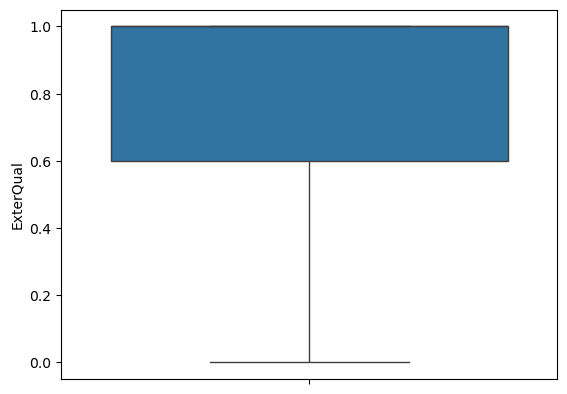

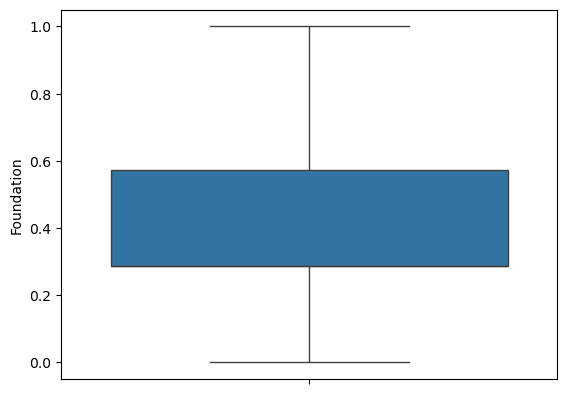

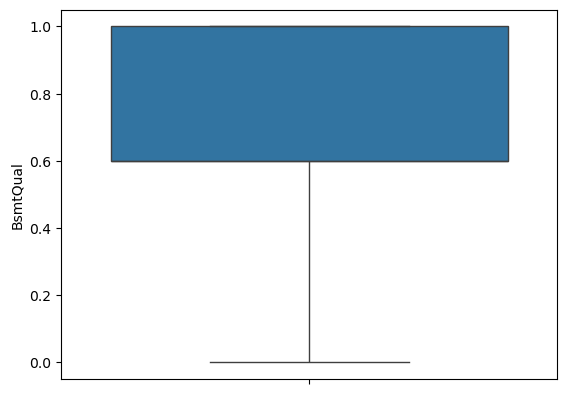

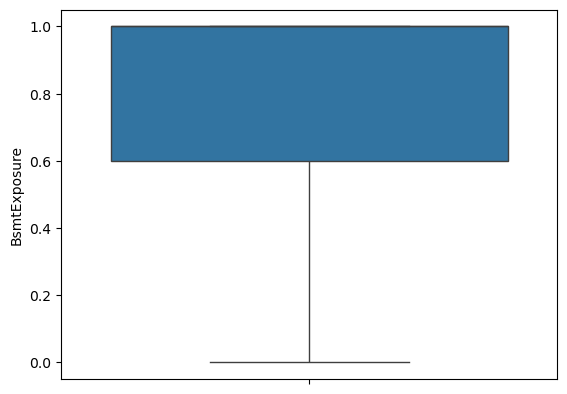

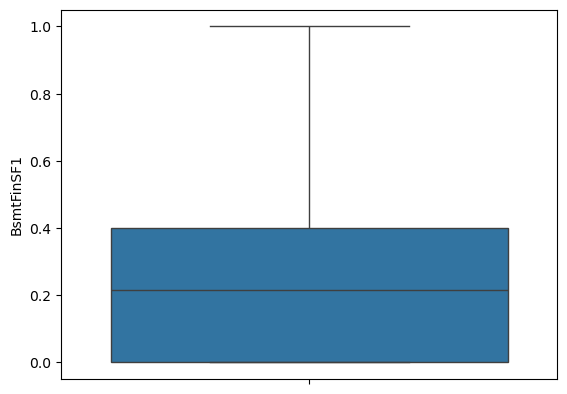

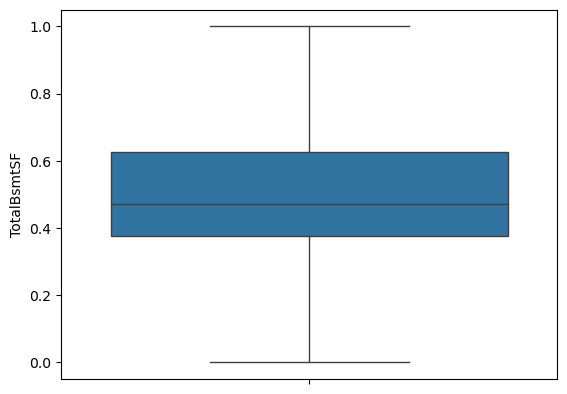

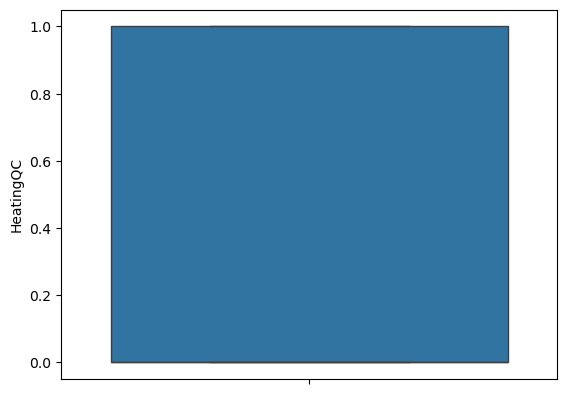

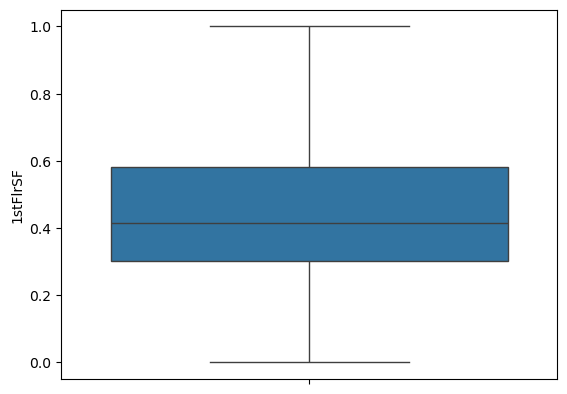

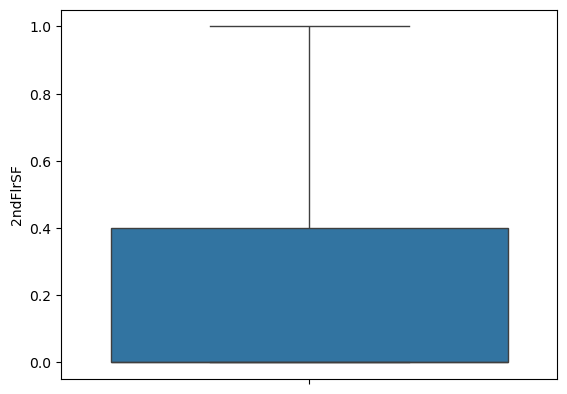

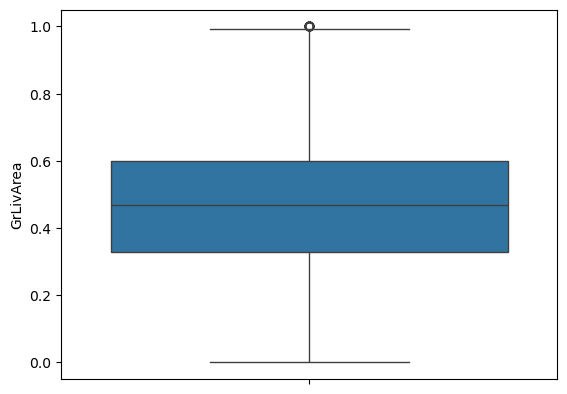

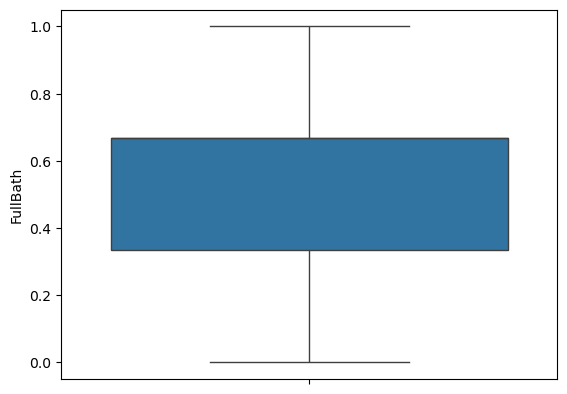

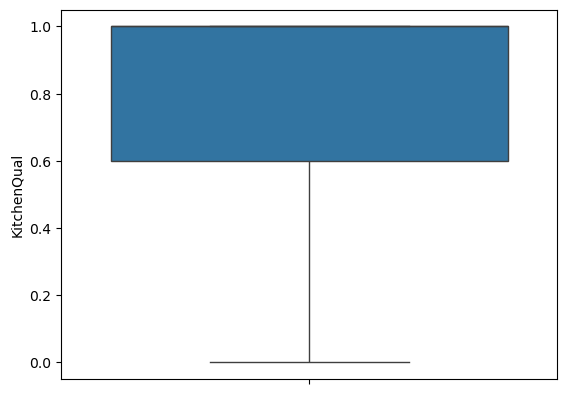

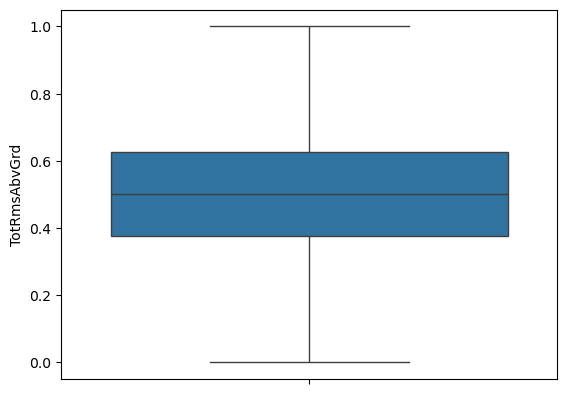

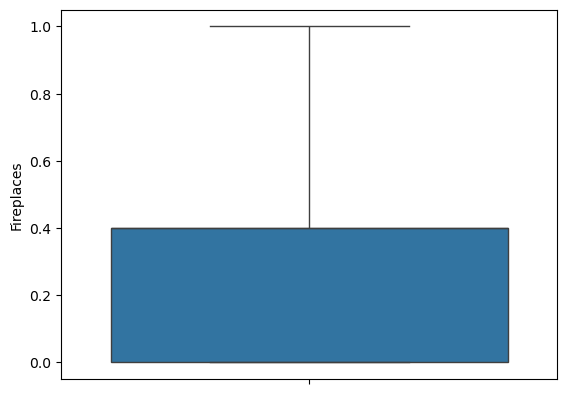

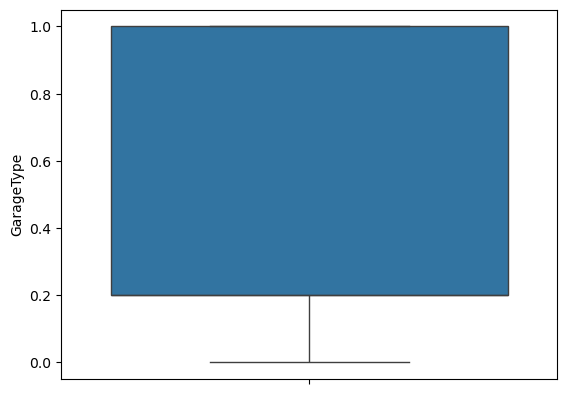

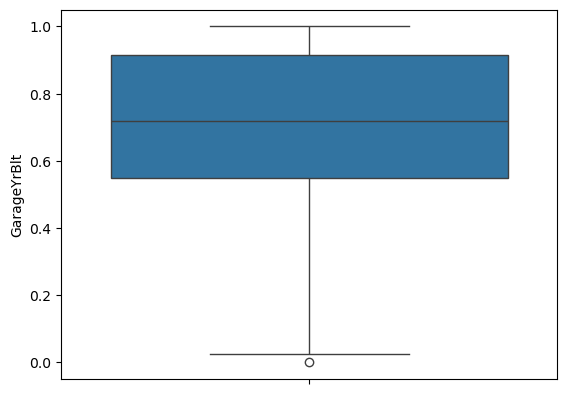

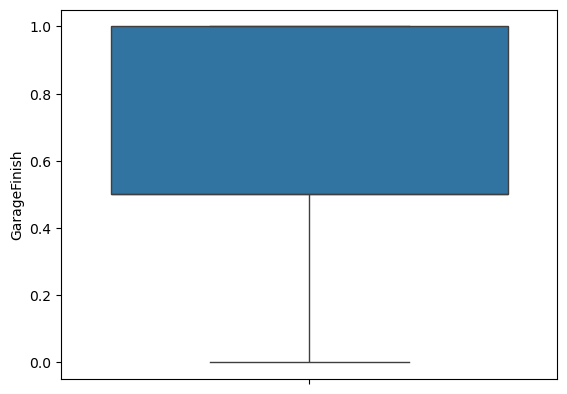

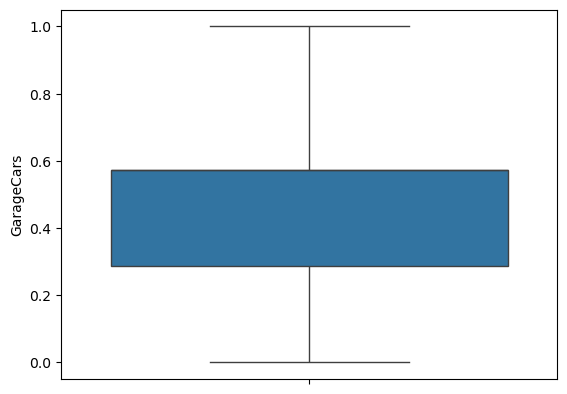

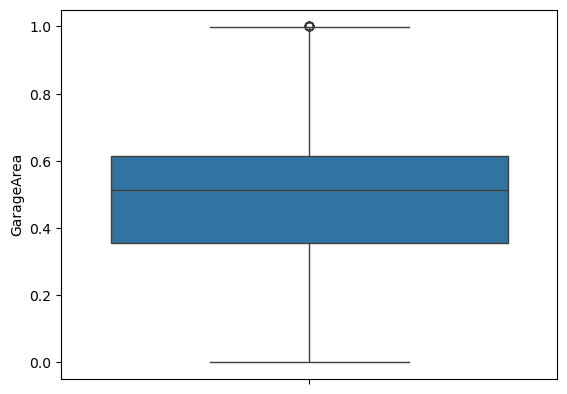

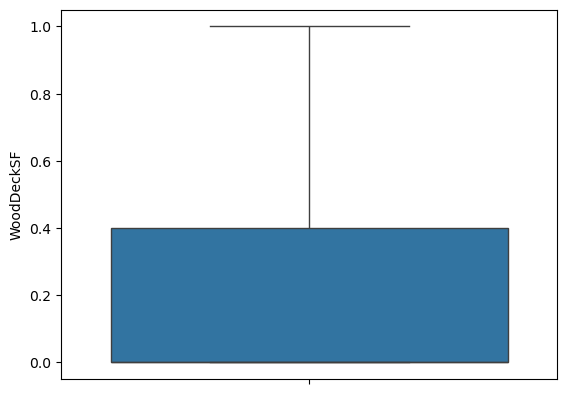

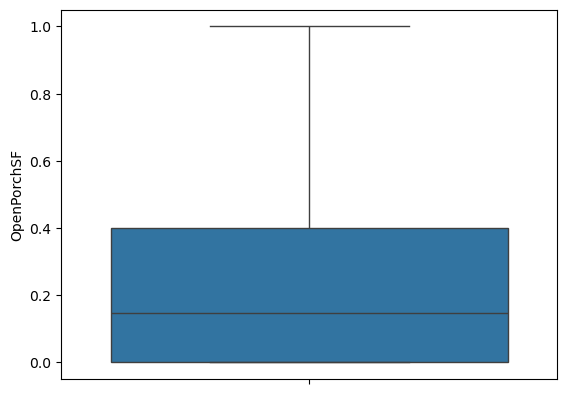

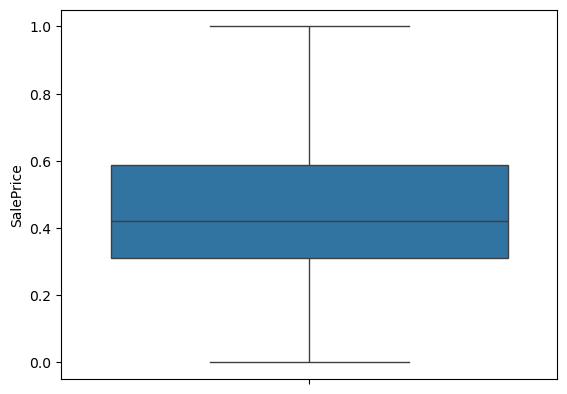

In [21]:
import seaborn as sns
for col in data1.select_dtypes(include="number").columns:
  sns.boxplot(data1[col])
  plt.show()

In [22]:
from sklearn.model_selection import train_test_split


X = data1.drop('SalePrice', axis=1) 
y = data1['SalePrice']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)
r2_score(y_test,y_pred)

0.8969575298603089

#### PCA

In [25]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)

X_train_pca= pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin_reg=LinearRegression()
lin_reg.fit(X_train_pca,y_train)
y_pred=lin_reg.predict(X_test_pca)
r2_score(y_test,y_pred) 

0.8843092665618363

In [28]:
import mlflow
import os

os.environ["git_python_refresh"]="quiet"
os.environ["mlflow_tracking_uri"]="file:///Users/user/OneDrive/Desktop/mlflow"

In [29]:
mlflow.set_experiment("SalePrice-analysis")
mlflow.set_experiment_tag("SalePrice-tag","ex1")

In [ ]:
with mlflow.start_run():
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

     # model object initialization
    RandFor = RandomForestRegressor(n_estimators=5000, max_depth=6)
    GBM = GradientBoostingRegressor(n_estimators=3000, max_depth=6, learning_rate=0.01, min_samples_split=5)
    LinReg = LinearRegression()

    rf_n_estimators = 5000
    
    # logging parameters
    mlflow.log_param("rf_n_estimators", rf_n_estimators)
    mlflow.log_param('rf_max_depth', 6)
    mlflow.log_param('gbm_n_estimators', 3000)
    mlflow.log_param('gbm_max_depth', 6)
    mlflow.log_param('gbm_learning_rate', 0.01)
    mlflow.log_param('gbm_minimum_samples_split', 5)

    # training models
    rf = RandFor.fit(x_train, y_train)
    gbm = GBM.fit(x_train, y_train)
    lr = LinReg.fit(x_train, y_train)
 # training scores
    training_score_rf = rf.score(x_train, y_train)
    training_score_gbm = gbm.score(x_train, y_train)
    training_score_lr = lr.score(x_train, y_train)
    
    # logging training scores
    mlflow.log_metric("rf_training_score_r2", training_score_rf)
    mlflow.log_metric("gbm_training_score_r2", training_score_gbm)
    mlflow.log_metric("lr_training_score_r2", training_score_lr)

    # value predictions
    y_pred_rf = rf.predict(x_test)
    y_pred_gbm = gbm.predict(x_test)
    y_pred_lr = lr.predict(x_test)

    # prediction evaluations
    testing_score_rf = r2_score(y_test, y_pred_rf)
    testing_score_gbm = r2_score(y_test, y_pred_gbm)
    testing_score_lr = r2_score(y_test, y_pred_lr)
    
    # logging evaluation scores
    mlflow.log_metric("rf_testing_score_r2", testing_score_rf)
    mlflow.log_metric("gbm_testing_score_r2", testing_score_gbm)
    mlflow.log_metric("lr_testing_score_r2", testing_score_lr)
    # training metrics
    rf_train_mse = mean_squared_error(y_train, rf.predict(x_train))
    gbm_train_mse = mean_squared_error(y_train, gbm.predict(x_train))
    lr_train_mse = mean_squared_error(y_train, lr.predict(x_train))
    
    rf_train_mae = mean_absolute_error(y_train, rf.predict(x_train))
    gbm_train_mae = mean_absolute_error(y_train, gbm.predict(x_train))
    lr_train_mae = mean_absolute_error(y_train, lr.predict(x_train))

    # logging training metrics
    mlflow.log_metric("rf_training_mse", rf_train_mse)
    mlflow.log_metric("gbm_training_mse", gbm_train_mse)
    mlflow.log_metric("lr_training_mse", lr_train_mse)
    
    mlflow.log_metric("rf_training_mae", rf_train_mae)
    mlflow.log_metric("gbm_training_mae", gbm_train_mae)
    mlflow.log_metric("lr_training_mae", lr_train_mae)

    # testing metrics
    rf_test_mse = mean_squared_error(y_test, y_pred_rf)
    gbm_test_mse = mean_squared_error(y_test, y_pred_gbm)
    lr_test_mse = mean_squared_error(y_test, y_pred_lr)
    
    rf_test_mae = mean_absolute_error(y_test, y_pred_rf)
    gbm_test_mae = mean_absolute_error(y_test, y_pred_gbm)
    lr_test_mae = mean_absolute_error(y_test, y_pred_lr)
# logging testing metrics
    mlflow.log_metric("rf_testing_mse", rf_test_mse)
    mlflow.log_metric("gbm_testing_mse", gbm_test_mse)
    mlflow.log_metric("lr_testing_mse", lr_test_mse)
    
    mlflow.log_metric("rf_testing_mae", rf_test_mae)
    mlflow.log_metric("gbm_testing_mae", gbm_test_mae)
    mlflow.log_metric("lr_testing_mae", lr_test_mae)
    
    # logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")
    mlflow.sklearn.log_model(lr, "linear-regression-model")